In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE= 256
BATCH_SIZE=32


In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 20637 files belonging to 15 classes.


In [6]:
class_names=dataset.class_names

In [7]:
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [8]:
len(dataset)
#32*68~ 2152

645

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy()) #every element we get is the tensor so we need to covert into the numpy (3 classes)
#(32, 256, 256, 3)
#               rgb(channels)

(32, 256, 256, 3)
[12 10  5 11  7 12  2 11 12 14  5 12 14 10 11 12  9  7  7  5 14  1  0 12
  3  2  5 14  9  7  5  9]


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[132. 127. 149.]
  [133. 128. 150.]
  [128. 123. 145.]
  ...
  [  6.   5.   1.]
  [  6.   5.   0.]
  [  6.   5.   0.]]

 [[ 83.  78. 100.]
  [131. 126. 148.]
  [134. 129. 151.]
  ...
  [  7.   6.   2.]
  [  7.   6.   1.]
  [  7.   6.   1.]]

 [[160. 155. 177.]
  [132. 127. 149.]
  [104.  99. 121.]
  ...
  [  7.   6.   2.]
  [  7.   6.   2.]
  [  7.   6.   2.]]

 ...

 [[140. 136. 161.]
  [141. 137. 162.]
  [138. 134. 159.]
  ...
  [106. 101. 133.]
  [117. 112. 144.]
  [106. 101. 133.]]

 [[174. 170. 195.]
  [171. 167. 192.]
  [163. 159. 184.]
  ...
  [105. 100. 132.]
  [116. 111. 143.]
  [108. 103. 135.]]

 [[139. 135. 160.]
  [134. 130. 155.]
  [127. 123. 148.]
  ...
  [130. 125. 157.]
  [119. 114. 146.]
  [121. 116. 148.]]], shape=(256, 256, 3), dtype=float32)


In [11]:
#every number is represented between 0-255 (color is represented bit by 0-255)
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[116., 109., 117.],
        [116., 109., 117.],
        [115., 108., 116.],
        ...,
        [124., 116., 127.],
        [134., 126., 137.],
        [147., 139., 150.]],

       [[116., 109., 117.],
        [115., 108., 116.],
        [115., 108., 116.],
        ...,
        [140., 132., 143.],
        [141., 133., 144.],
        [139., 131., 142.]],

       [[116., 109., 117.],
        [115., 108., 116.],
        [114., 107., 115.],
        ...,
        [145., 137., 148.],
        [144., 136., 147.],
        [140., 132., 143.]],

       ...,

       [[ 59.,  54.,  60.],
        [ 62.,  57.,  63.],
        [ 65.,  60.,  66.],
        ...,
        [129., 122., 130.],
        [129., 122., 130.],
        [130., 123., 131.]],

       [[ 72.,  67.,  73.],
        [ 74.,  69.,  75.],
        [ 73.,  68.,  74.],
        ...,
        [126., 119., 127.],
        [127., 120., 128.],
       

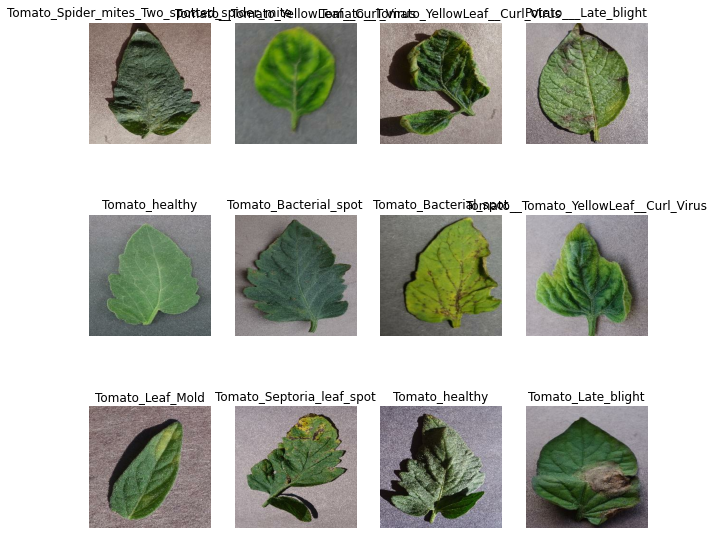

In [12]:
#visualize the images
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) #convert into the integers as it is the float
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [13]:
len(dataset)
#each element is 32 batch so 32*68~2157

645

In [14]:
# 80%=>training set
# 20%=> 
# 10% validation set(used while traning process(after each echo we will do validation on this)), 
# 10% test set(final model builed we need to test accuray before deploying)

In [15]:
train_size=0.8
len(dataset)*train_size

516.0

In [16]:
train_dataset=dataset.take(54) #datset[:54]
len(train_dataset)

54

In [17]:
remaing_dataset=dataset.skip(54) #dataset[54:]
len(remaing_dataset)

591

In [18]:
# 10 percentage of validation set
val_size=0.1
len(dataset)*val_size

64.5

In [19]:
# we need to take the 6 images as the validation dataset
validation_datset=remaing_dataset.take(6)
len(validation_datset)

6

In [20]:
test_dataset=remaing_dataset.skip(6)
len(test_dataset)

585

In [21]:
#take the tensorflow dataset and split the train,test,val using below function
def dataset_partitioning_tf(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=1000):
    ds_size=len(dataset)
    
    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=12)#seed is for just predictability same seed every time it will give you same result
    
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    test_size=int(ds_size*test_split)
    
    train_ds=dataset.take(train_size)
    rem_ds=dataset.skip(train_size)
    val_ds=rem_ds.take(val_size)
    test_ds=rem_ds.skip(val_size)
    
    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds=dataset_partitioning_tf(dataset)

In [23]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

516
64
65


In [24]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#this improve the preformance of pipeline as it stores the images in cache
#if we are using GPU or CPU if GPU is busy taining prefetch will load the next set of batch from your disk that will improve the performance

# preprocessing

In [25]:
#scaling the numpy array between 0-1 by dviding it by 255 (rgb)
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [26]:
"""make model robust
if we train a model using some images and then try predicting and if we supply image that is rotated or diff in contrast 
then our model will not erform better.
so we use the concept called as tensorflow data argumentaion 
original image=>horizontal_flip,contrast,rotation,zoom 4 new training smaples(new training samples)
"""

'make model robust\nif we train a model using some images and then try predicting and if we supply image that is rotated or diff in contrast \nthen our model will not erform better.\nso we use the concept called as tensorflow data argumentaion \noriginal image=>horizontal_flip,contrast,rotation,zoom 4 new training smaples(new training samples)\n'

In [27]:
#data augmentaion
# data_augmentaion=tf.keras.Sequential([
#     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#     layers.experimental.preprocessing.RandomRotation(0.2)
# ])

# Building the model using CNN

In [28]:
CHANNELS = 3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
EPOCHS=25

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
    
)

Epoch 1/25


In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
history.history['accuracy']

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend()
plt.title("Training and Validation loss")

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
# model_dir = "../models"
# model_version = 1
# model_export_path = f"{model_dir}/{model_version}"

# tf.saved_model.save(
#     model,
#     export_dir=model_export_path,
# )

# print(f"SavedModel files: {os.listdir(model_export_path)}")

In [ ]:
model_vesion=1
model.save(f"../models/{model_vesion}")

In [ ]:
# import os
# model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
# model.save(f"../models/{model_version}")

In [ ]:
# model.save("../potatoes.h5")